# 2.8. Итоговое задание

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

Наш датасет находится здесь: https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST_through+14OCT2019+type@asset+block/stud_math.csv

### Описание датасета
###### Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - менее 15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - больше 60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - менее 2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 -  более 10 часов)
15. failures — количество внеучебных неудач (n, если n от 1 до 2 включительно(1 больше-равен n меньше 3), иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

## Рекомендации по выполнению проекта
1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
6. Проведите корреляционный анализ количественных переменных
7. Отберите не коррелирующие переменные.
8. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
9. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

Загрузим необходимые библиотеки и данные

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from itertools import combinations
#from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.csv')

Посмотрим на данные

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Посмотрим на статистику датасета

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

В датасете 13 числовых и 17 строковых признаков.
В данных имеются пропуски.

In [6]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Визиализируем распределение пропусков в данных:

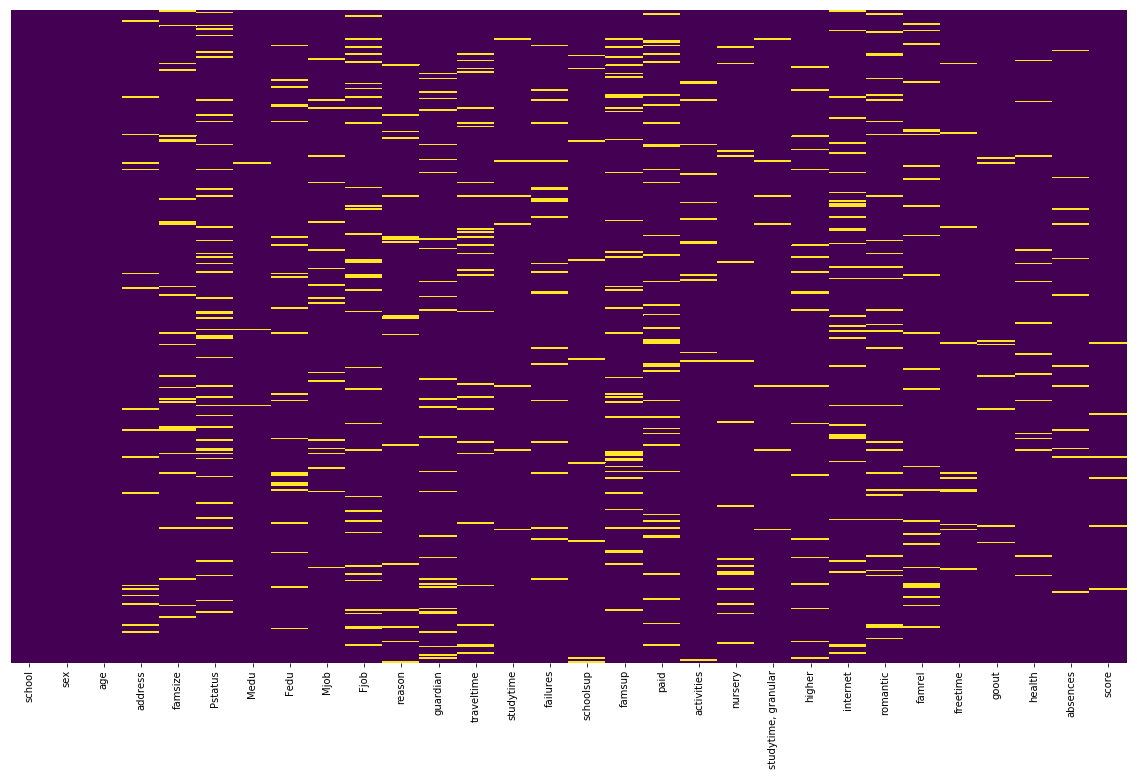

In [7]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Пропуски присутствуют по всему датасету, кроме первых трех столбцов. В целевой переменной тоже есть пропуски.

Посмотрим сколько значений останется, если просто удалить пустые значения:

In [8]:
print("Останется", len(df.dropna()), "из", len(df), "записей:", round(len(df.dropna())/len(df)*100, 2), "%")

Останется 97 из 395 записей: 24.56 %


Да уж, останется всего четверть данных. 

Просто удалить строки с пропусками не получится.

Посмотрим матрицу корреляции числовых признаков

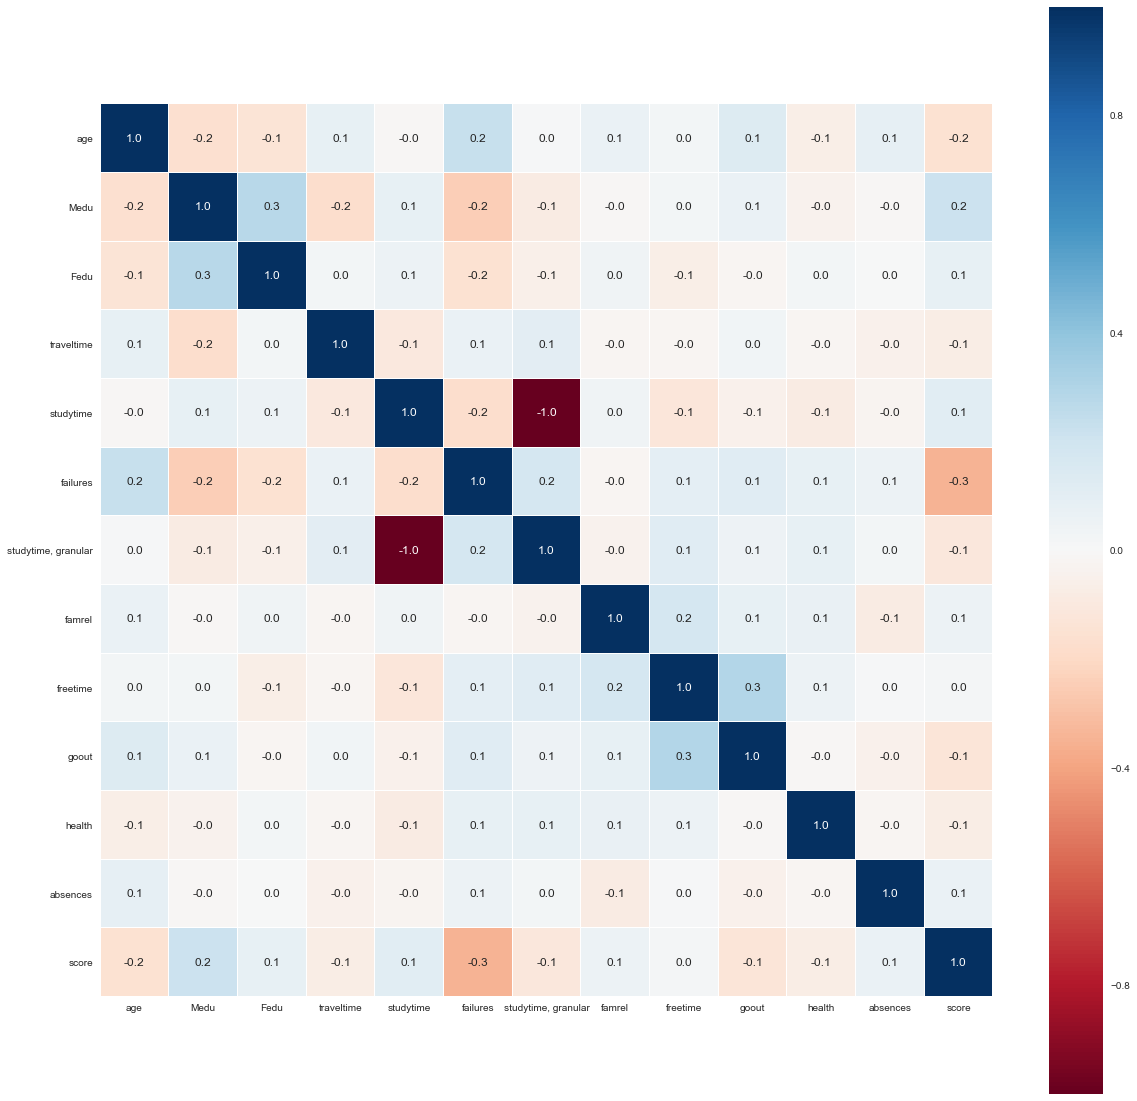

In [9]:
sns.set(font_scale=1)
plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

В датасете есть столбец 'studytime, granular', которого нет в описании к заданию.

Судя по корреляционной матрице, он имеет стопроцентную обратую зависимость со столбцом 'studytime'.

Удалим столбец 'studytime, granular':

In [10]:
df.drop(["studytime, granular"], axis=1, inplace=True)

# Предварительная обработка призников

## 01. school
Категориальный признак. Посмотрим количество уникальных аббревиатур школ:

In [11]:
df.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

В признаке всего два уникальных значения. Пропусков нет. 

Заменим значения "GP" на 1 и "MS" на 0

In [12]:
# Или так
# sd = pd.get_dummies(df.school)
# df = sd.join(df)
# df.drop(['school'], axis=1,  inplace=True)

In [13]:
# Или так
df.school = df.school.apply(lambda x: 1 if x == 'GP' else 0)

## 02. sex
Категориальный признак. Пропусков нет. Заменим значения на 0 и 1.

In [14]:
# Значения довольно сбалансированные:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [15]:
df.sex = df.sex.apply(lambda x: 1 if x == 'M' else 0)

## 03. age
Целочисленный признак. Пропусков нет. Посмотрим распределение:

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

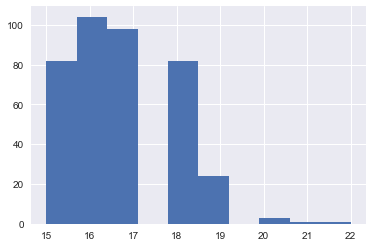

In [16]:
plt.hist(df.age)
df.age.value_counts()

Значения больше 19 можно рассматривать как ВЫБРОСЫ
Удалим их из датасета:

In [17]:
df = df[df.age <= 19]

## 04. adress

In [95]:
print(df.address.value_counts())
df.address.isnull().value_counts()

1.0    302
0.0     82
Name: address, dtype: int64


False    384
Name: address, dtype: int64

Заменим городское проживание на 1, а сельское на 0

In [19]:
df.address = df.address.apply(lambda x: 0 if x == 'R' else 1)# if x=='U')

## 05. famsize
27 пропусков. Медианное значение "БОЛЬШЕ 3 ЧЛЕНОВ СЕМЬИ" == 1. Можно заменить пропуски этим значением.

In [96]:
df.famsize.value_counts()

1.0    278
0.0    106
Name: famsize, dtype: int64

In [97]:
df.famsize.isnull().sum()

0

In [98]:
df.famsize = df.famsize.apply(lambda x: 0 if x == 'LE3' else 1)

## 06. Pstatus 
45 пропусков. В большинстве случаев: 314 из 395 родители живут совместно.

Заменяем пропуски медианным значением "родители живут совместно" == 1 

In [24]:
df.Pstatus.value_counts()

T    311
A     34
Name: Pstatus, dtype: int64

In [25]:
df.Pstatus.isnull().sum()

45

In [26]:
df.Pstatus = df.Pstatus.apply(lambda x: 0 if x == 'A' else 1)

## 07. Medu
Пропусков нет. Значение 0 - "без образования" можно считать выбросом

4.0    130
2.0    101
3.0     95
1.0     58
0.0      3
Name: Medu, dtype: int64

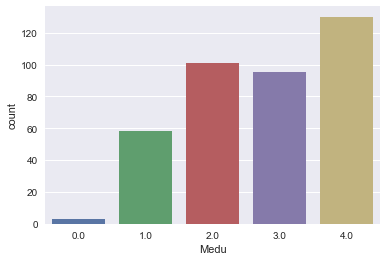

In [27]:
ax = sns.countplot(x="Medu", data=df)
df.Medu.value_counts()

Заменим значение 0 на 1

In [28]:
df.Medu = df.Medu.replace({0.0: 1.0})

Посчитаем пропуски:

In [29]:
df.Medu.isnull().value_counts()

False    387
True       3
Name: Medu, dtype: int64

Столбец коррелирует со столбцом 'Fedu'
Попрробуем заменить NaN значения значениями из 'Fedu'

In [30]:
df.Medu = df.Medu.fillna(df.Fedu)
df.Medu.isnull().value_counts()

False    390
Name: Medu, dtype: int64

## 08. Fedu
24 пропуска

Есть выброс 40.0

Два значения 0 тоже можно считать выбросами

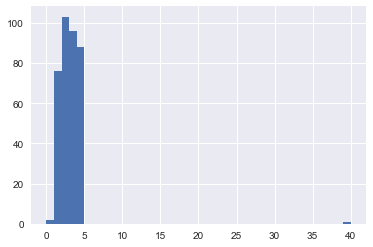

In [31]:
df.Fedu.hist(bins = int(df.Fedu.max() - df.Fedu.min()))

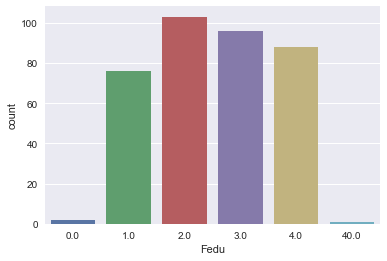

In [32]:
ax = sns.countplot(x="Fedu", data=df)

Заменим значение признака 40.0 на 4.0
И поменяем строки со значением 0 на 1

In [33]:
df.Fedu = df.Fedu.replace({0.0: 1.0, 40.0: 4.0})

Столбец коррелирует со столбцом 'Medu'
Попрробуем заменить NaN значения значениями из 'Medu'

In [34]:
df.Fedu = df.Fedu.fillna(df.Medu)
df.Fedu.isnull().value_counts()

False    390
Name: Fedu, dtype: int64

## 09. Mjob 
19 пропусков.

False    371
True      19
Name: Mjob, dtype: int64


False    371
True      19
Name: Mjob, dtype: int64

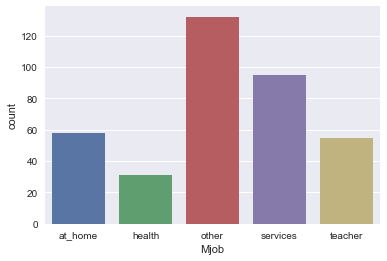

In [35]:
ax = sns.countplot(x="Mjob", data=df)
print(df.Mjob.isnull().value_counts())
df.Mjob.isnull().value_counts()

In [36]:
df.Mjob.isnull().value_counts()

False    371
True      19
Name: Mjob, dtype: int64

Заменим пропуски на "other" и сделаем из столбца dummy переменную.

In [37]:
df.Mjob = df.Mjob.fillna('other')
df.Mjob.isnull().value_counts()

False    390
Name: Mjob, dtype: int64

In [38]:
dumm = pd.get_dummies(df.Mjob, prefix='Mjob')
df = df.join(dumm)
df.drop(['Mjob'], axis=1,  inplace=True)

## 10. Fjob

False    354
True      36
Name: Fjob, dtype: int64

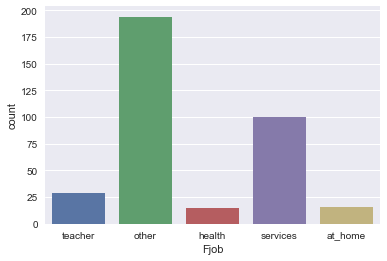

In [39]:
ax = sns.countplot(x="Fjob", data=df)
df.Fjob.isnull().value_counts()

Заменим пропуски на "other" и сделаем из столбца dummy переменную.

In [40]:
df.Fjob = df.Fjob.fillna('other')
df.Fjob.isnull().value_counts()

False    390
Name: Fjob, dtype: int64

In [41]:
dumm = pd.get_dummies(df.Fjob, prefix='Fjob')
df = df.join(dumm)
df.drop(['Fjob'], axis=1,  inplace=True)

## 11. reason 
17 пропусков

False    373
True      17
Name: reason, dtype: int64

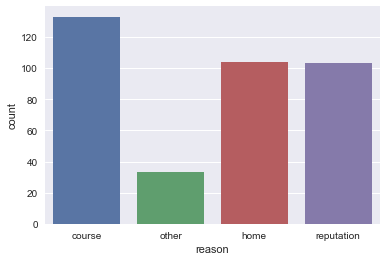

In [42]:
ax = sns.countplot(x="reason", data=df)
df.reason.isnull().value_counts()

Заменим 17 пропусков, например, на "other"

In [43]:
df.reason = df.reason.fillna('other')
df.reason.isnull().value_counts()

False    390
Name: reason, dtype: int64

Сделаем из столбца dummy переменную:

In [44]:
dumm = pd.get_dummies(df.reason, prefix='reason')
df = df.join(dumm)
df.drop(['reason'], axis=1,  inplace=True)

In [45]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,1,0,18,1,1,0,4.0,4.0,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
1,1,0,17,1,1,1,1.0,1.0,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1,0,15,1,0,1,1.0,1.0,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0,15,1,1,1,4.0,2.0,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,16,1,1,1,3.0,3.0,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


## 12. guardian
31 пропуск в данных.

False    362
True      28
Name: guardian, dtype: int64

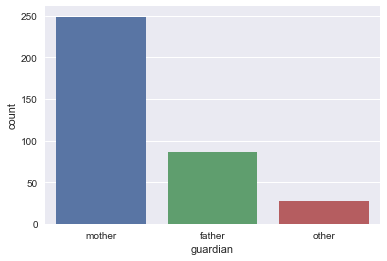

In [46]:
ax = sns.countplot(x="guardian", data=df)
df.guardian.isnull().value_counts()

Заменим пропуски на медианное - "mother"

In [47]:
df.guardian = df.guardian.fillna('mother')
df.guardian.isnull().value_counts()

False    390
Name: guardian, dtype: int64

Сделаем dummy переменную:

In [48]:
dumm = pd.get_dummies(df.guardian, prefix='guardian')
df = df.join(dumm)
df.drop(['guardian'], axis=1,  inplace=True)

## 13. traveltime
28 пропусков.

False    362
True      28
Name: traveltime, dtype: int64

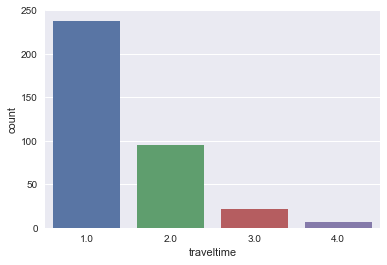

In [49]:
ax = sns.countplot(x="traveltime", data=df)
df.traveltime.isnull().value_counts()

Заменим пропуски на самое частое - 1.0

In [50]:
df.traveltime = df.traveltime.fillna(1.0)
df.traveltime.isnull().value_counts()

False    390
Name: traveltime, dtype: int64

## 14. studytime

False    383
True       7
Name: studytime, dtype: int64

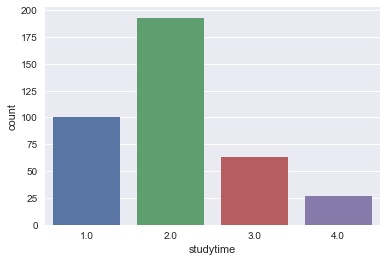

In [51]:
ax = sns.countplot(x="studytime", data=df)
df.studytime.isnull().value_counts()

Заменим 7 пропусков на самое частое - 2.0

In [52]:
df.studytime = df.studytime.fillna(1.0)
df.studytime.isnull().value_counts()

False    390
Name: studytime, dtype: int64

## 15. failures

False    368
True      22
Name: failures, dtype: int64

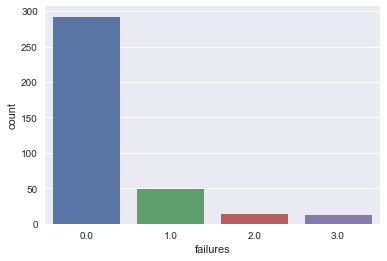

In [53]:
ax = sns.countplot(x="failures", data=df)
df.failures.isnull().value_counts()

В основном, нет "внеучебных неудач". Заменим пропуски на 0.0

In [54]:
df.failures = df.failures.fillna(0.0)
df.failures.isnull().value_counts()

False    390
Name: failures, dtype: int64

## Столбцы с 16 по 23

16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)

Заменим значения "yes" и "no" на 1 и 0 соответственно в цикле

In [55]:
for i in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    df[i] = df[i].replace({'yes': 1, 'no': 0})
    #ax = sns.countplot(x=i, data=df)
    #print(df[i].isnull().value_counts())

## 16. schoolsup — дополнительная образовательная поддержка (yes или no)

False    382
True       8
Name: schoolsup, dtype: int64

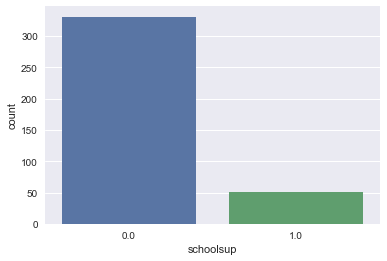

In [56]:
ax = sns.countplot(x="schoolsup", data=df)
df.schoolsup.isnull().value_counts()

In [57]:
# Заменим пропуски на 0.0
df.schoolsup = df.schoolsup.fillna(0.0)
df.schoolsup.isnull().value_counts()

False    390
Name: schoolsup, dtype: int64

## 17. famsup — семейная образовательная поддержка (yes или no)


False    351
True      39
Name: famsup, dtype: int64

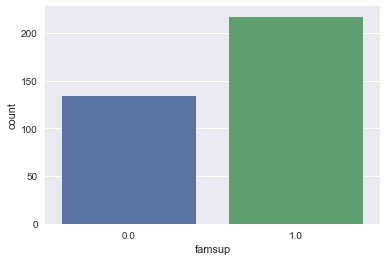

In [59]:
ax = sns.countplot(x="famsup", data=df)
df.famsup.isnull().value_counts()

Столбец коррелирует со столбцом 'paid'. Заменим пропуски значениями из 'paid'

In [60]:
df.famsup = df.famsup.fillna(df.paid)
df.famsup.isnull().value_counts()

False    386
True       4
Name: famsup, dtype: int64

Осталось 4 пропуска. Заполним их 1

In [61]:
df.famsup = df.famsup.fillna(1)
df.famsup.isnull().value_counts()

False    390
Name: famsup, dtype: int64

## 18. paid — дополнительные платные занятия по математике (yes или no)

False    350
True      40
Name: paid, dtype: int64

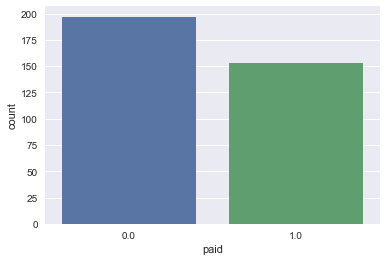

In [62]:
ax = sns.countplot(x="paid", data=df)
df.paid.isnull().value_counts()

Столбец коррелирует со столбцом 'famsup'. Заменим пропуски значениями из 'famsup'

In [63]:
df.paid = df.paid.fillna(df.famsup)
df.paid.isnull().value_counts()

False    390
Name: paid, dtype: int64

## 19. activities — дополнительные внеучебные занятия (yes или no)

False    376
True      14
Name: activities, dtype: int64

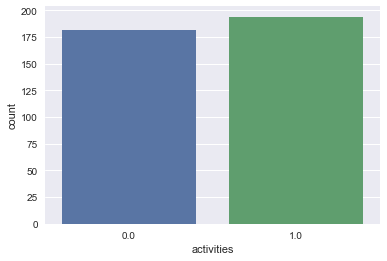

In [64]:
ax = sns.countplot(x="activities", data=df)
df.activities.isnull().value_counts()

Тут 14 пропусков. Заполним их 1

In [65]:
df.activities = df.activities.fillna(1)
df.activities.isnull().value_counts()

False    390
Name: activities, dtype: int64

## 20. nursery — посещал детский сад (yes или no)

False    374
True      16
Name: nursery, dtype: int64

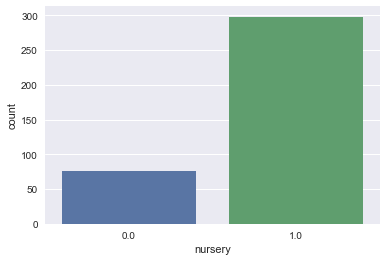

In [66]:
ax = sns.countplot(x="nursery", data=df)
df.nursery.isnull().value_counts()

Тут 16 пропусков. Заполним их на 1 - детский сад был!

In [67]:
df.nursery = df.nursery.fillna(1)
df.nursery.isnull().value_counts()

False    390
Name: nursery, dtype: int64

## 21. higher — хочет получить высшее образование (yes или no)

False    371
True      19
Name: higher, dtype: int64

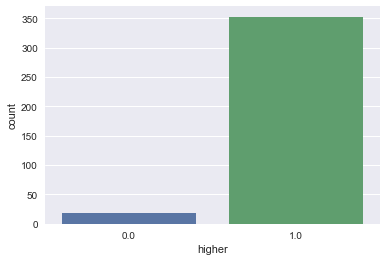

In [68]:
ax = sns.countplot(x="higher", data=df)
df.higher.isnull().value_counts()

Абсолютное большинство хочет получить высшее образование. Заменим пропуски на 1

In [69]:
df.higher = df.higher.fillna(1)
df.higher.isnull().value_counts()

False    390
Name: higher, dtype: int64

## 22. internet — наличие интернета дома (yes или no)

False    356
True      34
Name: internet, dtype: int64

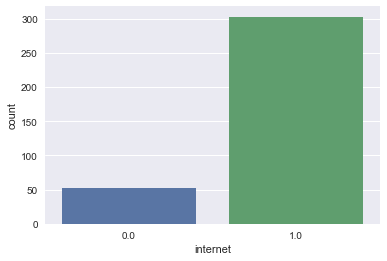

In [70]:
ax = sns.countplot(x="internet", data=df)
df.internet.isnull().value_counts()

У большинства интернет есть. Заменим пропуски на 1

In [71]:
df.internet = df.internet.fillna(1)
df.internet.isnull().value_counts()

False    390
Name: internet, dtype: int64

## 23. romantic — в романтических отношениях (yes или no)

False    359
True      31
Name: romantic, dtype: int64

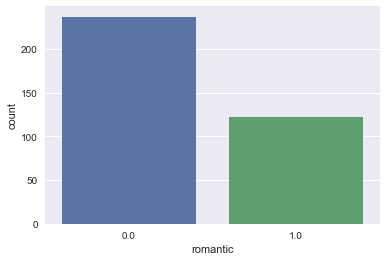

In [72]:
ax = sns.countplot(x="romantic", data=df)
df.romantic.isnull().value_counts()

Столбец ни с чем особо не коррелирует. Заменим пропуски на 0

In [73]:
df.romantic = df.romantic.fillna(0)
df.romantic.isnull().value_counts()

False    390
Name: romantic, dtype: int64

## 24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

False    363
True      27
Name: famrel, dtype: int64

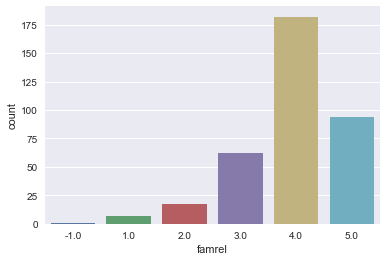

In [74]:
ax = sns.countplot(x="famrel", data=df)
df.famrel.isnull().value_counts()

Заменим 27 пропусков на самое частое значение: 4

In [75]:
df.famrel = df.famrel.fillna(4)
df.famrel.isnull().value_counts()

False    390
Name: famrel, dtype: int64

Заменим выброс -1 на 1

In [76]:
df.famrel = df.famrel.replace({-1.0: 1.0})

## 25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

False    379
True      11
Name: freetime, dtype: int64

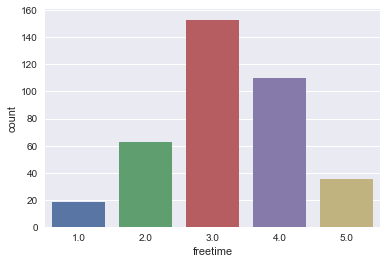

In [77]:
ax = sns.countplot(x="freetime", data=df)
df.freetime.isnull().value_counts()

Заменим пропуски на тройку.

In [78]:
df.freetime = df.freetime.fillna(3)
df.freetime.isnull().value_counts()

False    390
Name: freetime, dtype: int64

## 26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

False    382
True       8
Name: goout, dtype: int64

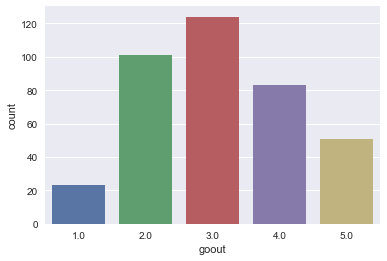

In [79]:
ax = sns.countplot(x="goout", data=df)
df.goout.isnull().value_counts()

Заменим 8 пропусков на тройку.

In [80]:
df.goout = df.goout.fillna(3)
df.goout.isnull().value_counts()

False    390
Name: goout, dtype: int64

## 27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

False    375
True      15
Name: health, dtype: int64

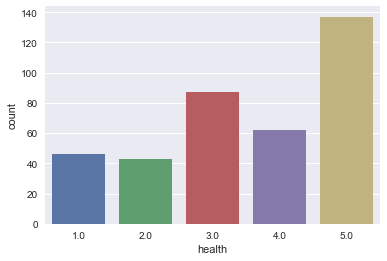

In [81]:
ax = sns.countplot(x="health", data=df)
df.health.isnull().value_counts()

Почти половина выборки абсолютно здорова. Назначим 15 пропусков здоровяками!

In [82]:
df.health = df.health.fillna(5)
df.health.isnull().value_counts()

False    390
Name: health, dtype: int64

## 28. absences — количество пропущенных занятий

False    378
True      12
Name: absences, dtype: int64

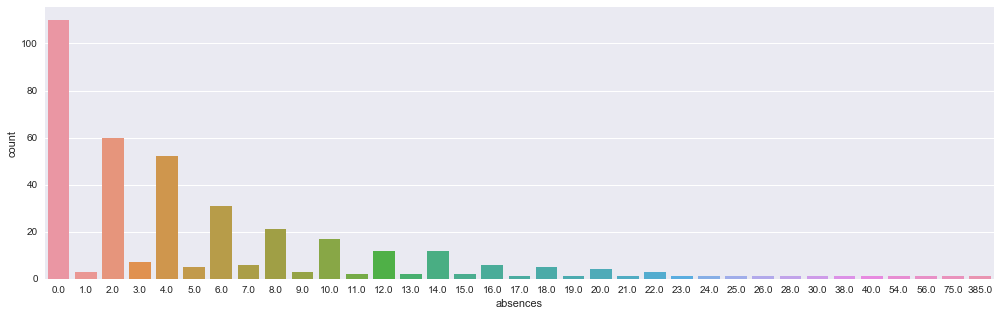

In [83]:
plt.subplots(figsize=(17, 5))
ax = sns.countplot(x="absences", data=df)
df.absences.isnull().value_counts()

Так как нечетных значений заметно больше, прибавим единицу ко всем четным значениям для более равномерного распределения признака:

In [84]:
def t(row):
    if row['absences'] % 2 == 1:
       row['absences'] += 1        
    return row

df = df.apply(lambda row: t(row), axis=1)

Значения больше 28 будем считать выбросами и приравняем к 30

In [85]:
df.absences = df.absences.apply(lambda x: 28 if x >= 28 else x)

Заменим пропуски нулями

In [86]:
df.absences = df.absences.fillna(0)
df.absences.isnull().value_counts()

False    390
Name: absences, dtype: int64

False    390
Name: absences, dtype: int64

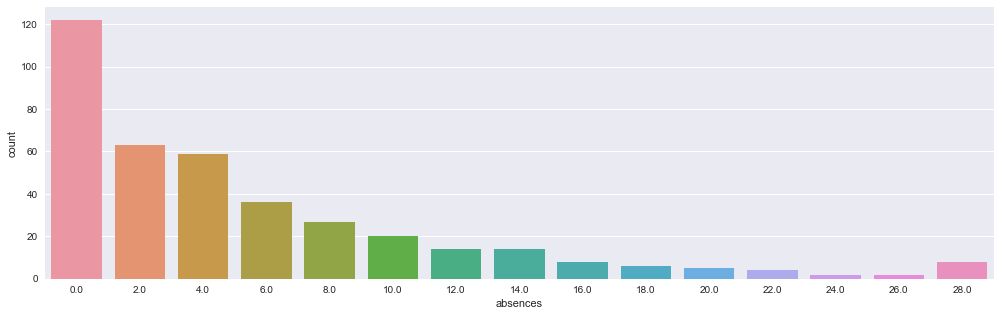

In [87]:
plt.subplots(figsize=(17, 5))
ax = sns.countplot(x="absences", data=df)
df.absences.isnull().value_counts()

## 29. score - целевая переменная

False    384
True       6
Name: score, dtype: int64

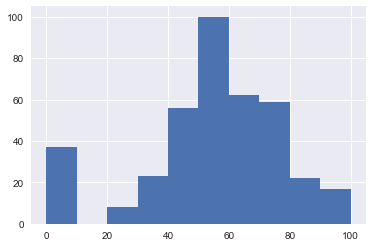

In [88]:
df.score.hist()
df.score.isnull().value_counts()

In [89]:
df.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     32
65.0     31
60.0     31
40.0     30
70.0     27
45.0     26
80.0     16
30.0     15
90.0     11
35.0      8
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Избавимся от пропусков:

In [90]:
df.dropna(inplace = True)

In [91]:
Поставим колонку с целевой переменной в конец  датасета для удобства:

SyntaxError: invalid syntax (<ipython-input-91-caea63ab4455>, line 1)

In [ ]:
cols = df.columns.tolist()
cols.remove('score')
cols.append('score')
df = df[cols]

Распределение похоже на нормальное. Но есть значение 0.0 в количестве 37 штук. Скорее всего - это выброс(например, совсем не сдавали тест). В таком случае, строки со значением 0.0 придется удалять. Но это неточно: возможно данные описывают как сдать тест на НОЛЬ. 

УДАЛИМ ДАННЫЕ С НУЛЯМИ В ЦЕЛЕВОЙ ПЕРЕМЕННОЙ

In [ ]:
df1 = df[df.score != 0.0]

In [ ]:
sns.set(font_scale=1)
plt.subplots(figsize=(20, 20))
sns.heatmap(df1.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [ ]:
df1.corrwith(df1.score)

In [ ]:
len(df)

## Вывод:
Видим что НЕГАТИВНО сказывается на успеваемости: 
* пропуски занятий 
* прогулки 
* возраст(видимо, с возрастом учиться сложнее)
* дополнительная образовательная поддержка(видимо, ее предоставляею совсем отстающим ученикам).
А ПОЗИТИВНО: 
* образование матери (и отца) 
* пол! 
* время потраченное на учебу
* желание получить высшее образование 
* работа матери в здравоохранении 
* работа отца учителем 
* городское проживание

Для построения модели машинного обучения рекомендую использовать столбцы:
'sex', 
'age', 
'address', 
'Medu', 
'Fedu', 
'studytime', 
'failures', 
'schoolsup', 
'higher', 
'goout', 
'absences', 
'Mjob_health',
'Fjob_teacher',
'Mjob_other'

## Вывод по обработке данных:
1. В данных много пропусков. Удаление строк с пропусками сократило бы набор данных на три четверти.
2. Обработка пропусков заняла больше всего времени при подготовке данных
3. В данных имеются выбросы. Некоторые легко интерпретируемы, а некоторые (типа выброса со значением 0.0 в целевой переменной в объеме 10% от выборки) требуют дополнительного анализа.
4. Некоторые признаки коррелируют друг с другом и заполнение отсутствующих значений возможно с помощью столбца - донора
5. Заполнение отсутствующих значений в большинстве случаев можно было автоматизировать заполнением наиболее часто встречающимся значенем. 
6. Возможно более сложное заполнение отсутствующих значений, но для этого потребуется построение дополнительных моделей машинного обучения, предсказывающих данные столбца на основе других столбцов.